# House Prices: Advanced Regression Techniques

**Competition Description:**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Exectuive Summary:**

This is my first Data Science Project and I chose this competition to focus on regression. The learning outcomes are: 
* Plotting Data to show insights within features
* Dealing with Missing Data
* Feature Engineering
* Modeled Data
* Predicted House Prices using LASSO, Ridge, ElasticNet, XGBoost, and GBR

**Load Packages**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from datetime import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Load Data**

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

**Exploratory Data Analysis**

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [3]:
quantitative = [feat for feat in train.columns if train.dtypes[feat] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [feat for feat in train.columns if train.dtypes[feat] == 'object']
feat = {'Quantitative': pd.Series(quantitative),
       'Qualitative': pd.Series(qualitative)}
features = pd.DataFrame(feat)
print(features.fillna(''))

     Quantitative    Qualitative
0      MSSubClass       MSZoning
1     LotFrontage         Street
2         LotArea          Alley
3     OverallQual       LotShape
4     OverallCond    LandContour
5       YearBuilt      Utilities
6    YearRemodAdd      LotConfig
7      MasVnrArea      LandSlope
8      BsmtFinSF1   Neighborhood
9      BsmtFinSF2     Condition1
10      BsmtUnfSF     Condition2
11    TotalBsmtSF       BldgType
12       1stFlrSF     HouseStyle
13       2ndFlrSF      RoofStyle
14   LowQualFinSF       RoofMatl
15      GrLivArea    Exterior1st
16   BsmtFullBath    Exterior2nd
17   BsmtHalfBath     MasVnrType
18       FullBath      ExterQual
19       HalfBath      ExterCond
20   BedroomAbvGr     Foundation
21   KitchenAbvGr       BsmtQual
22   TotRmsAbvGrd       BsmtCond
23     Fireplaces   BsmtExposure
24    GarageYrBlt   BsmtFinType1
25     GarageCars   BsmtFinType2
26     GarageArea        Heating
27     WoodDeckSF      HeatingQC
28    OpenPorchSF     CentralAir
29  Enclos

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


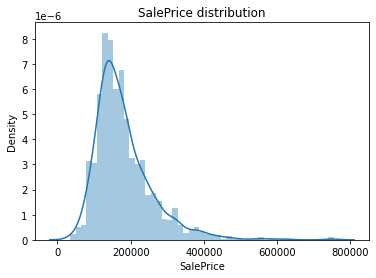

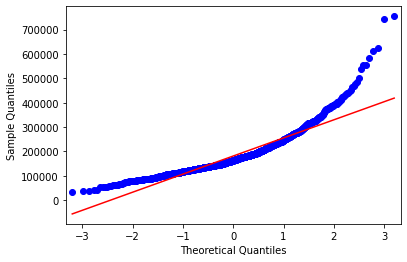

In [4]:
sns.distplot(train['SalePrice'])
plt.title('SalePrice distribution')
fig = sm.qqplot(train['SalePrice'], line='r')

In [5]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Skewness: 1.882876
Kurtosis: 6.536282


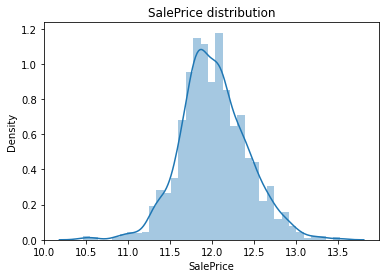

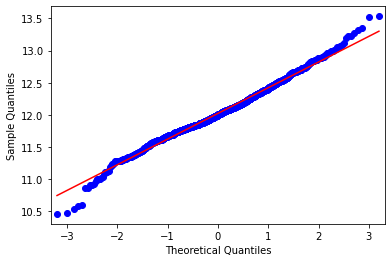

In [6]:
train_data_log = np.log1p(train['SalePrice'])
sns.distplot(train_data_log)
plt.title('SalePrice distribution')
fig = sm.qqplot(train_data_log, line='r')
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Text(0.5, 1.0, 'Overall Quality and Sale Price Plot')

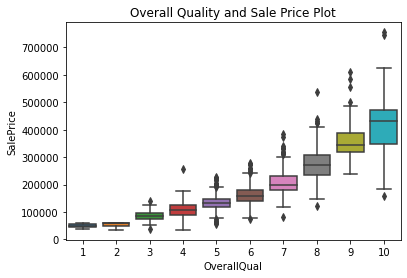

In [7]:
var='OverallQual'
sns.boxplot(x=train[var],y=train['SalePrice'])
plt.title('Overall Quality and Sale Price Plot')

Text(0.5, 1.0, 'General Living Area and Sale Price Linear Regression Plot')

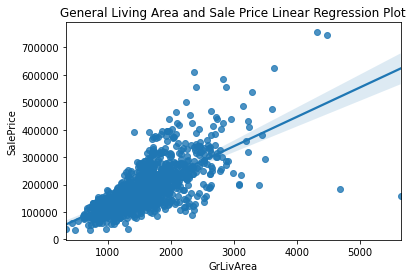

In [8]:
var = 'GrLivArea'
sns.regplot(x=train[var],y=train['SalePrice'])
plt.title('General Living Area and Sale Price Linear Regression Plot')

Text(0.5, 1.0, 'Overall Condition and Sale Price Plot')

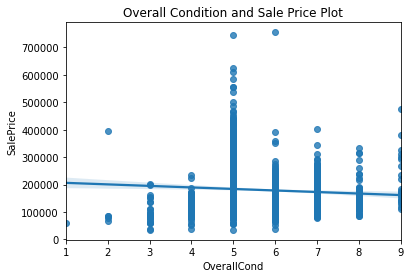

In [9]:
var = 'OverallCond'
sns.regplot(x=train[var],y=train['SalePrice'])
plt.title('Overall Condition and Sale Price Plot')

Text(0.5, 1.0, 'Features Correlation Heat Map')

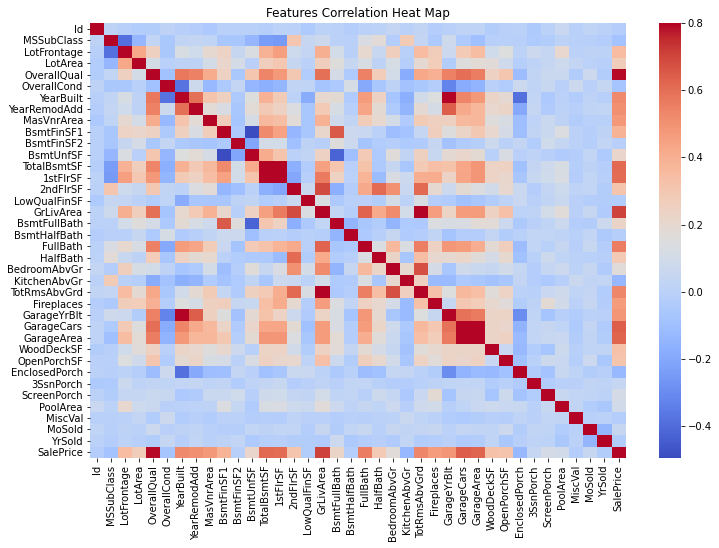

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), vmax=0.8, cmap = 'coolwarm')
plt.title('Features Correlation Heat Map')

In [11]:
high_corr = train.corr()
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) >= 0.5]
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

Text(0.5, 1.0, 'Total Basement SF and Sale Price Linear Regression Plot')

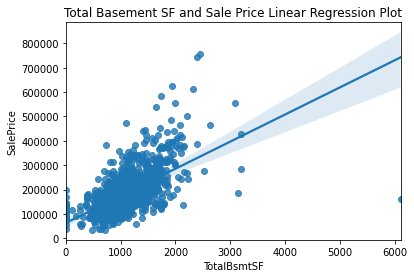

In [12]:
var = 'TotalBsmtSF'
sns.regplot(x=train[var],y=train['SalePrice'])
plt.title('Total Basement SF and Sale Price Linear Regression Plot')


Text(0.5, 1.0, 'First Floor SF and Sale Price Linear Regression Plot')

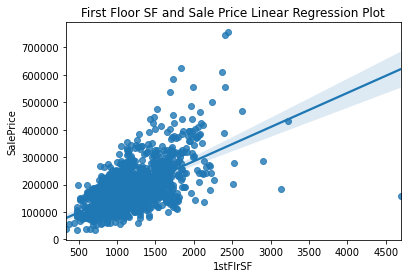

In [13]:
var = '1stFlrSF'
sns.regplot(x=train[var],y=train['SalePrice'])
plt.title('First Floor SF and Sale Price Linear Regression Plot')

Text(0.5, 1.0, 'Garage SF and Sale Price Linear Regression Plot')

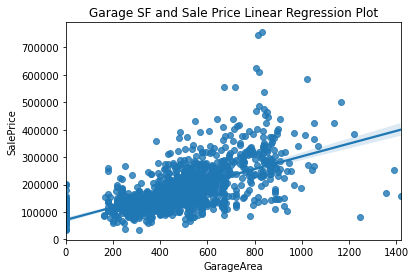

In [14]:
var = 'GarageArea'
sns.regplot(x=train[var],y=train['SalePrice'])
plt.title('Garage SF and Sale Price Linear Regression Plot')

Text(0.5, 1.0, 'Cars in Garage and Sale Price Linear Regression Plot')

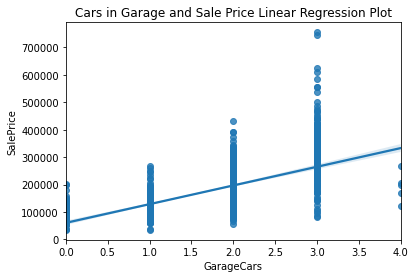

In [15]:
var = 'GarageCars'
sns.regplot(x=train[var],y=train['SalePrice'])
plt.title('Cars in Garage and Sale Price Linear Regression Plot')

**Categorical Features**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


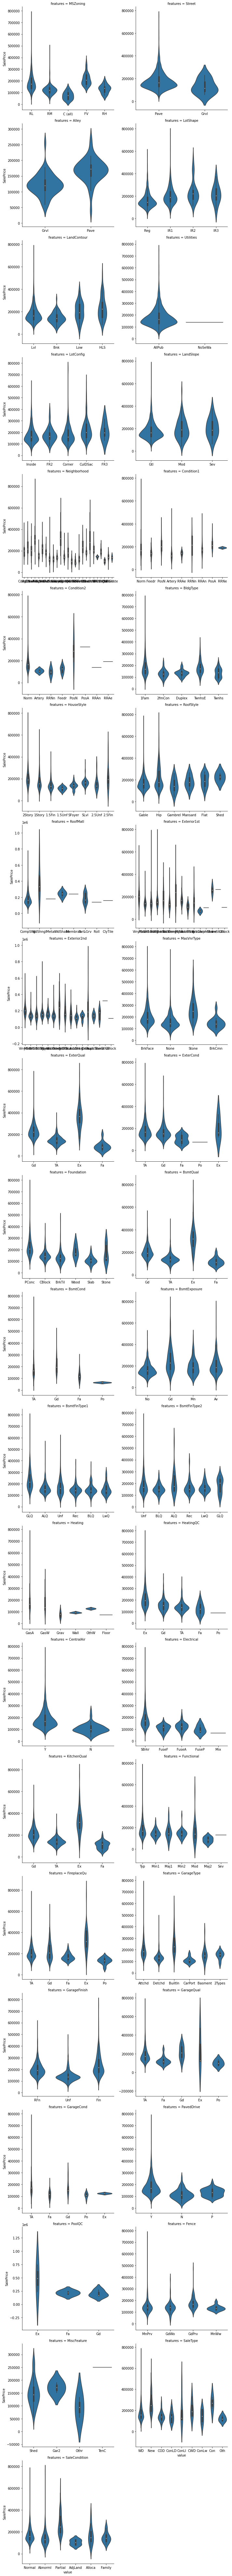

In [16]:
cate_data = train.select_dtypes(include=['object','category'])
cate_data.columns
data = pd.melt(pd.concat([cate_data, train['SalePrice']],axis=1),
               id_vars=['SalePrice'], value_vars=cate_data.columns, var_name='features')
g = sns.FacetGrid(data, col='features', col_wrap=2,sharex=False,sharey=False, height=5)
g.map(sns.violinplot, 'value','SalePrice')

**Dealing with Missing Data**

In [17]:
train.loc[(train.SalePrice>600000)]
train = train[(train.SalePrice<600000) & (train.GrLivArea<4500)]
house_data = pd.concat([train,test]).reset_index(drop=True)

In [18]:
missing_col = house_data.columns[house_data.isnull().any()]
print(missing_col)

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')


In [19]:
#missing value chart by percentage
missing_val = ((house_data.isnull().sum() / len(house_data)) * 100)
missing_val = missing_val.drop(missing_val[missing_val == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Data': missing_val})
missing_data

,Missing Data
PoolQC,99.725369
MiscFeature,96.395469
Alley,93.202884
Fence,80.432544
SalePrice,50.085822
FireplaceQu,48.746996
LotFrontage,16.683831
GarageCond,5.458290
GarageYrBlt,5.458290
GarageFinish,5.458290


In [20]:
bsmt_object = list(house_data.loc[:,house_data.dtypes == 'object'].columns.values)
print(bsmt_object)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [21]:
value = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
house_data = house_data.drop(house_data[value], axis=1)

In [22]:
bsmt_col = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
bsmt_feat = house_data[bsmt_col]
for col in bsmt_col:
    house_data[col] = house_data[col].fillna('None')

In [23]:
garage_col = ['GarageType','GarageFinish','GarageQual','GarageCond']
house_data['GarageYrBlt'] = house_data['GarageYrBlt'].astype(str)
garage_feat = house_data[garage_col]
for col in garage_col:
    house_data[col]=house_data[col].fillna('None')

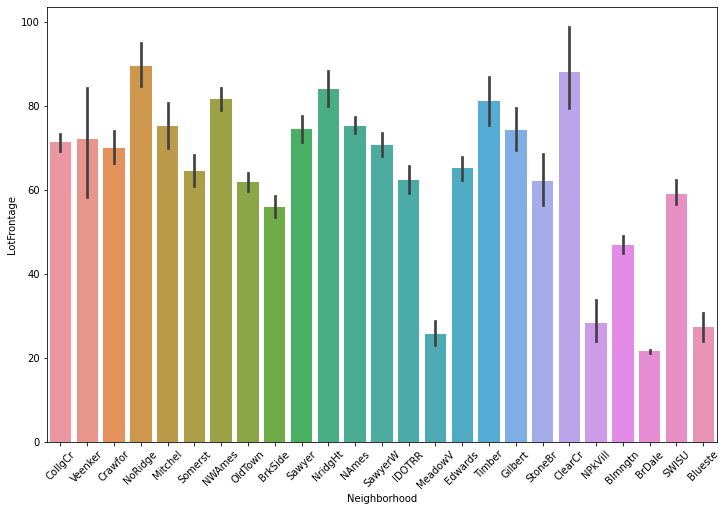

In [24]:
value = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical']
plt.figure(figsize=(12,8))
chart = sns.barplot(x=house_data['Neighborhood'],
                    y=house_data['LotFrontage'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
house_data['LotFrontage'] = house_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [25]:
masvnr = ['MasVnrType','MasVnrArea']
masvnr_null = house_data[masvnr].loc[house_data.MasVnrType.isnull()]
house_data['MasVnrType'] = house_data['MasVnrType'].fillna("None")
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(0)

In [26]:
elec = house_data['Electrical']
house_data['Electrical'] = house_data['Electrical'].fillna("SBrkr")

In [27]:
missing_col = house_data.columns[house_data.isnull().any()]
value = ['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold']
house_data[value].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [28]:
house_data['YearBuilt'] = house_data['YearBuilt'].astype(str)
house_data['YearRemodAdd'] = house_data['YearRemodAdd'].astype(str)
house_data['MoSold'] = house_data['MoSold'].astype(str)
house_data['YrSold'] = house_data['YrSold'].astype(str)

In [29]:
test_missing_col = house_data.columns[house_data.isnull().any()]
print(test_missing_col)
house_data[test_missing_col].head

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType', 'SalePrice'],
      dtype='object')


<bound method NDFrame.head of      MSZoning Utilities Exterior1st Exterior2nd  BsmtFinSF1  BsmtFinSF2  \
0          RL    AllPub     VinylSd     VinylSd       706.0         0.0   
1          RL    AllPub     MetalSd     MetalSd       978.0         0.0   
2          RL    AllPub     VinylSd     VinylSd       486.0         0.0   
3          RL    AllPub     Wd Sdng     Wd Shng       216.0         0.0   
4          RL    AllPub     VinylSd     VinylSd       655.0         0.0   
...       ...       ...         ...         ...         ...         ...   
2908       RM    AllPub     CemntBd     CmentBd         0.0         0.0   
2909       RM    AllPub     CemntBd     CmentBd       252.0         0.0   
2910       RL    AllPub     VinylSd     VinylSd      1224.0         0.0   
2911       RL    AllPub     HdBoard     Wd Shng       337.0         0.0   
2912       RL    AllPub     HdBoard     HdBoard       758.0         0.0   

      BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath KitchenQual 

In [30]:
missing_data_obj = ['MSZoning','Utilities','Exterior1st','Exterior2nd',
                   'KitchenQual','Functional','SaleType']
for col in missing_data_obj:
    house_data[col] = house_data[col].fillna('None')

missing_data_num = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars']
for col in missing_data_num:
    house_data[col] = house_data[col].fillna(0)

**Feature Engineering**

In [31]:
mylist = list(house_data.select_dtypes(include=['float64','int64']).columns)
print(mylist)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [32]:
house_data['TotalSF'] = house_data['TotalBsmtSF'] + house_data['1stFlrSF'] + house_data['2ndFlrSF']
house_data['Total_Bathrooms'] = (house_data['FullBath'] + (0.5 * house_data['HalfBath']) + house_data['BsmtFullBath'] + (0.5 * house_data['BsmtHalfBath']))
house_data['has2ndfloor'] = house_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house_data['hasgarage'] = house_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house_data['hasbsmt'] = house_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
drop_feat = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','2ndFlrSF','GarageArea','TotalBsmtSF']
house_data = house_data.drop(drop_feat, axis=1)

In [34]:
#house_data['LogSalePrice'] = np.log1p(house_data['SalePrice'])
#house_data['SalePrice'] = house_data['SalePrice'].fillna(0)
#house_data['LogSalePrice'] = house_data['LogSalePrice'].fillna(0)

In [35]:
test_missing_col = house_data.columns[house_data.isnull().any()]
print(test_missing_col)
house_data[test_missing_col].isna().sum()
for col in test_missing_col:
    house_data[col] = house_data[col].fillna(0)

Index(['SalePrice', 'TotalSF', 'Total_Bathrooms'], dtype='object')


**Categorical Encoding**

In [36]:
cat_data = [col for col in house_data.columns if house_data[col].dtype=='object']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(house_data[cat_data]))
OH_cols.index = house_data.index
drop_data = house_data.drop(cat_data, axis=1)
final_data = pd.concat([drop_data, OH_cols], axis=1)

**Modeling the Data**

In [37]:
test_id = test['Id']
train_data = final_data.loc[final_data.Id<1461]
test_data = final_data.loc[final_data.Id>=1461]

In [38]:
x_data = train_data.drop(['SalePrice','Id'], axis=1)
y_data = train_data['SalePrice']
testing_ID = test_data['Id']
testing_data = test_data.drop(['SalePrice','Id'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2,
                                                   random_state=32)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1163, 577), (291, 577), (1163,), (291,))

In [41]:
kfolds = KFold(shuffle=True,random_state=32, n_splits=10)

In [42]:
def cross_val(model):
    pred = cross_val_score(model,X,y,cv=kfolds)
    return pred.mean()

def evaluation(true,predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true,predicted)
    print('MAE:',mae)
    print('MSE:',mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [43]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Ridge Model

MAE: 19073.962371281126
MSE: 848934908.6856986
RMSE: 29136.48758319538
R2 Square 0.8542864447829235


<AxesSubplot:xlabel='SalePrice'>

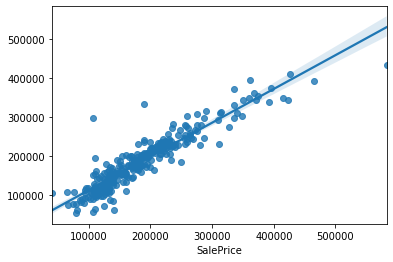

In [44]:
alphas_ridge = [0.005, 0.01, 0.1, 1, 5, 10, 15]
model_ridge = RidgeCV(alphas=alphas_ridge, cv=kfolds)
model_ridge.fit(X_train,y_train)
y_pred = model_ridge.predict(X_test)
evaluation(y_test, y_pred)
df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
sns.regplot(x=y_test, y=y_pred)

LASSO Model

In [45]:
#alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
#model_lasso = LassoCV(max_iter=1e7,alphas=alphas_lasso, random_state=42, cv=kfolds)
#model_lasso.fit(X_train,y_train)
#y_pred = model_lasso.predict(X_test)
#evaluation(y_test, y_pred)
#df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
#sns.regplot(x=y_test, y=y_pred)

Elastic Net Model

In [46]:
#alphas_elastic = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
#ratios_elastic = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
#model_elastic = ElasticNetCV(max_iter=1e7,alphas=alphas_elastic, random_state=42, cv=kfolds, l1_ratio=ratios_elastic)
#model_elastic.fit(X_train,y_train)
#y_pred = model_elastic.predict(X_test)
#evaluation(y_test, y_pred)
#df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
#sns.regplot(x=y_test, y=y_pred)

XGBoost Model

[19:18:14] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 13920.503785438144
MSE: 435441924.90774274
RMSE: 20867.245263995505
R2 Square 0.9252595336583508


<AxesSubplot:xlabel='SalePrice'>

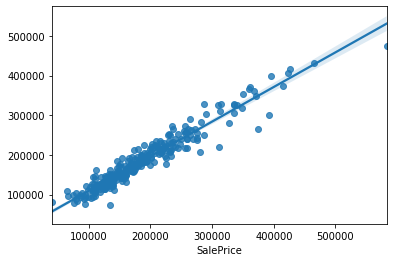

In [47]:
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
model_xgboost.fit(X_train,y_train)
y_pred = model_xgboost.predict(X_test)
evaluation(y_test, y_pred)
df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
sns.regplot(x=y_test, y=y_pred)

GBR Model

MAE: 14632.107084760382
MSE: 479412954.35139185
RMSE: 21895.50077873059
R2 Square 0.9177122235392413


<AxesSubplot:xlabel='SalePrice'>

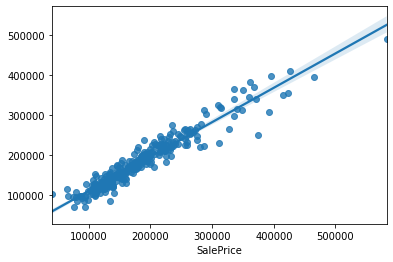

In [48]:
model_gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                      max_depth=4, max_features='sqrt', 
                                      min_samples_leaf=15, min_samples_split=10, 
                                      loss='huber', random_state =42)  
model_gbr.fit(X_train,y_train)
y_pred = model_gbr.predict(X_test)
evaluation(y_test, y_pred)
df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
sns.regplot(x=y_test, y=y_pred)

**Submission**

In [49]:
x_data = pipeline.fit_transform(x_data)
testing_data = pipeline.transform(testing_data)
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
model_xgboost.fit(x_data,y_data)
predicted_prices = model_xgboost.predict(testing_data)
prices = pd.DataFrame({'Predicted Price': predicted_prices})
prices.head(50)

[19:18:43] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,Predicted Price
0,124265.945312
1,162689.953125
2,182712.031250
3,189437.812500
4,186048.140625
5,168376.484375
6,175744.640625
7,165599.156250
8,187228.843750
9,129040.039062


In [50]:
submission = pd.DataFrame({'Id': testing_ID, 'SalePrice': predicted_prices})
submission.to_csv('submission.csv', index=False)

In [51]:
print(datetime.now())

2021-11-11 19:19:08.756807
